CREATE DATASET

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200 random values for the feature column
X = np.random.rand(200)

# Generate noise
noise = np.random.normal(0, 1, 200)

# Generate target column with a linear relationship
y = 3 * X + 5 + noise

# Create a DataFrame
df = pd.DataFrame({'feature': X, 'target': y})

# Save the DataFrame to a CSV file
df.to_csv('linear_regression_dataset.csv', index=False)

print(df.head())

    feature    target
0  0.374540  5.443596
1  0.950714  8.084397
2  0.731994  7.489054
3  0.598658  6.081624
4  0.156019  7.333830


PLOT DATA

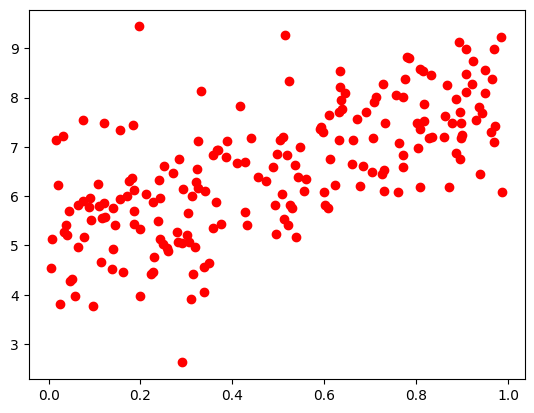

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(X, y,'ro')
#ro sets the datapoints to red dots
plt.show()


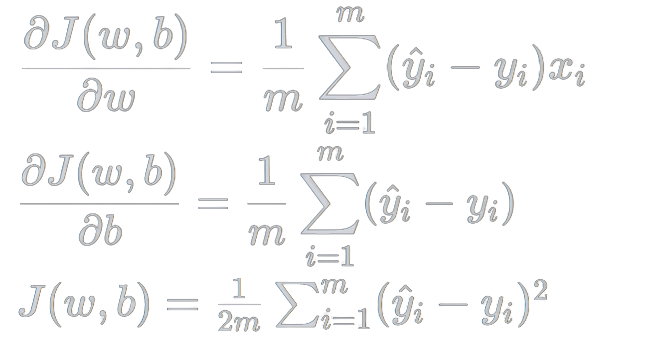

LINEAR REGRESSION FROM SCRATCH

In [ ]:
num_iter = 100
lr = 0.1
#Initiating variables w and b
w = 0.0
b = 0.0

#list to keep track of changes in cost function, w and b
history_cost = []
w_hist = []
b_hist = []

for i in range(num_iter):
  y_pred = w*X + b

  error = y_pred - y
  cost = 0.5*np.mean(error**2)

  dw = np.mean((y_pred - y)*X)
  db = np.mean((y_pred - y))

  #Here we are simultaneously updating both w and b

  w = w - lr*dw
  b = b - lr*db

  history_cost.append(cost)
  w_hist.append(w)
  b_hist.append(b)

print(w)
print(b)

2.8167038724985707
5.159902593519324


PLOT COST

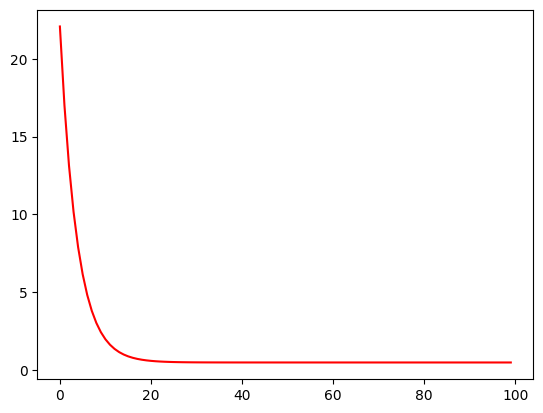

In [ ]:
plt.figure()
x_labels = np.arange(0, len(history_cost), 1)
plt.plot(x_labels,history_cost, 'r')
plt.show()

PLOT LINEAR REGRESSION

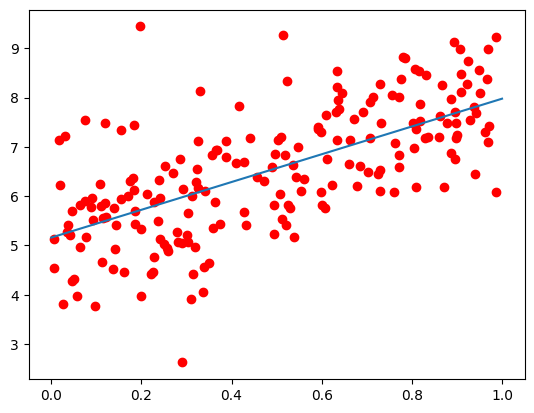

In [ ]:
plt.figure()
plt.plot(X,y,'ro')
x_line = np.linspace(0,1)
y_line = w*x_line + b
plt.plot(x_line, y_line)

VISUALISING LINEAR REGRESSION

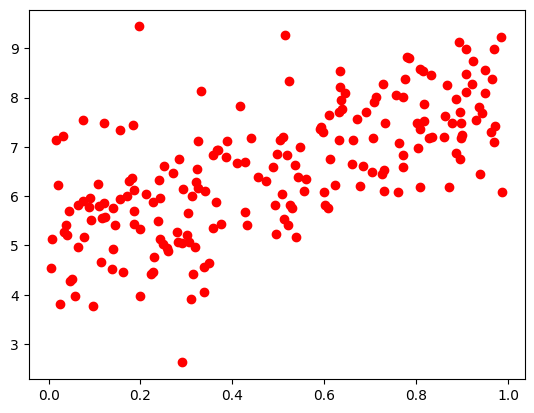

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

plt.plot(X,y,'ro')
line, = ax.plot([], [], lw=2)
def animate(i):

    y = w_hist[i] * X + b_hist[i]
    line.set_data(X, y)
    return (line,)
anim = animation.FuncAnimation(fig, animate,frames=len(w_hist), interval=100)
HTML(anim.to_html5_video())

LINEAR REGRESSION WITH SKLEARN

intercept: 5.105201150960824
slope: [2.92192893]


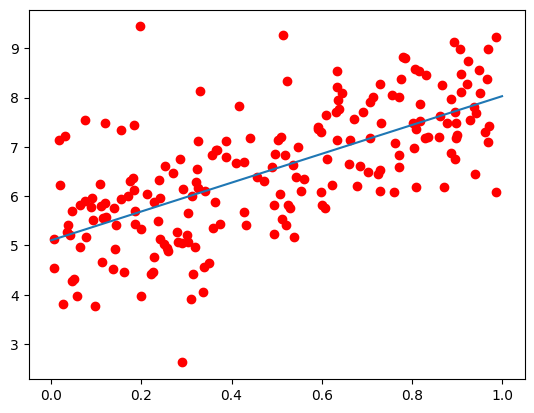

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv('linear_regression_dataset.csv')
x = np.array(data.iloc[:, 0]).reshape((-1, 1))
y = np.array(data.iloc[:, 1])

model = LinearRegression().fit(x, y)

# Print the Intercept:
print('intercept:', model.intercept_)
b = model.intercept_

# Print the Slope:
print('slope:', model.coef_)
w = model.coef_

# Predict a Response and print it:
y_pred = model.predict(x)
plt.figure()
plt.plot(x,y,'ro')
x_line = np.linspace(0,1)
y_line = w*x_line + b
plt.plot(x_line, y_line)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('housing.csv')

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


slido.com 4144016


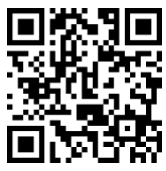

In [ ]:
X = np.array(data.iloc[:, :-1]).reshape((-1, 1))
y = np.array(data.iloc[:, 8])

label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)  #(df - df.min()) / (df.max() - df.min())

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.75
...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.25
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.25
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.25
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.25


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = data.fillna(0)


# Assume 'Price' is the target variable and the rest are features
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.02231807477122093
